In [1]:
import networkx as nx
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
#load datasets
df_classes = pd.read_csv(r"C:\Users\User\Desktop\UAB\3rd-year\2nd-semester\synthesis project II\elliptic_bitcoin_dataset\elliptic_txs_classes.csv")
df_edges = pd.read_csv(r"C:\Users\User\Desktop\UAB\3rd-year\2nd-semester\synthesis project II\elliptic_bitcoin_dataset\elliptic_txs_edgelist.csv")
df_features = pd.read_csv(r"C:\Users\User\Desktop\UAB\3rd-year\2nd-semester\synthesis project II\elliptic_bitcoin_dataset\elliptic_txs_features.csv", header=None)

In [3]:

# Change column names --> Column 1 is txId, Column 2 is timestep and the rest are unknown features
df_features.columns = ['txId', 'timestep'] + ['f' + str(i) for i in range(165)]

# Remove all edges that do not appear in classesDF
df_features = df_features[df_features['txId'].isin(df_classes['txId'])]

df_features.head(5)

# Append the class to the featuresDF based on txID
df_features = df_features.merge(df_classes, on='txId')

# Move features 'class' to first column
cols = list(df_features.columns)
cols = cols[:1] + [cols[-1]] + cols[1:-1]
df_features = df_features[cols]

df_features.head(5)

#add in degree and out degree for each node
in_degree_dict = {}
out_degree_dict = {}

for _, row in df_edges.iterrows():
    txId1, txId2 = row['txId1'], row['txId2']
    
    if txId2 not in in_degree_dict:
        in_degree_dict[txId2] = []
    in_degree_dict[txId2].append(txId1)
    
    if txId1 not in out_degree_dict:
        out_degree_dict[txId1] = []
    out_degree_dict[txId1].append(txId2)

valid_ids = set(df_features['txId'])

in_degree_dict_filtered = {k: [v for v in vals if v in valid_ids] for k, vals in in_degree_dict.items() if k in valid_ids}
out_degree_dict_filtered = {k: [v for v in vals if v in valid_ids] for k, vals in out_degree_dict.items() if k in valid_ids}

def get_in_degree_connections(txId):
    return in_degree_dict_filtered.get(txId, [])

def get_out_degree_connections(txId):
    return out_degree_dict_filtered.get(txId, [])

df_features['in_degree_edges'] = df_features['txId'].apply(get_in_degree_connections)
df_features['out_degree_edges'] = df_features['txId'].apply(get_out_degree_connections)

df_features.head() 

,txId,class,timestep,f0,f1,f2,f3,f4,f5,f6,...,f157,f158,f159,f160,f161,f162,f163,f164,in_degree_edges,out_degree_edges
0,230425980,unknown,1,-0.171469,-0.184668,-1.201369,-0.121970,-0.043875,-0.113002,-0.061584,...,1.461330,1.461369,0.018279,-0.087490,-0.131155,-0.097524,-0.120613,-0.119792,[98374661],[5530458]
1,5530458,unknown,1,-0.171484,-0.184668,-1.201369,-0.121970,-0.043875,-0.113002,-0.061584,...,-0.979074,-0.978556,0.018279,-0.087490,-0.131155,-0.097524,-0.120613,-0.119792,[230425980],[232403360]
2,232022460,unknown,1,-0.172107,-0.184668,-1.201369,-0.121970,-0.043875,-0.113002,-0.061584,...,-0.979074,-0.978556,-0.098889,-0.106715,-0.131155,-0.183671,-0.120613,-0.119792,[232000575],"[232438397, 232022462]"
3,232438397,2,1,0.163054,1.963790,-0.646376,12.409294,-0.063725,9.782742,12.414558,...,0.241128,0.241406,1.072793,0.085530,-0.131155,0.677799,-0.120613,-0.119792,"[232022460, 232047899, 3877118, 230452718, 230...",[92491280]
4,230460314,unknown,1,1.011523,-0.081127,-1.201369,1.153668,0.333276,1.312656,-0.061584,...,0.517257,0.579382,0.018279,0.277775,0.326394,1.293750,0.178136,0.179117,"[3272536, 230724244]","[230459870, 230460307, 230459688, 230570333, 2..."


In [4]:
list(df_features.columns)

['txId',
 'class',
 'timestep',
 'f0',
 'f1',
 'f2',
 'f3',
 'f4',
 'f5',
 'f6',
 'f7',
 'f8',
 'f9',
 'f10',
 'f11',
 'f12',
 'f13',
 'f14',
 'f15',
 'f16',
 'f17',
 'f18',
 'f19',
 'f20',
 'f21',
 'f22',
 'f23',
 'f24',
 'f25',
 'f26',
 'f27',
 'f28',
 'f29',
 'f30',
 'f31',
 'f32',
 'f33',
 'f34',
 'f35',
 'f36',
 'f37',
 'f38',
 'f39',
 'f40',
 'f41',
 'f42',
 'f43',
 'f44',
 'f45',
 'f46',
 'f47',
 'f48',
 'f49',
 'f50',
 'f51',
 'f52',
 'f53',
 'f54',
 'f55',
 'f56',
 'f57',
 'f58',
 'f59',
 'f60',
 'f61',
 'f62',
 'f63',
 'f64',
 'f65',
 'f66',
 'f67',
 'f68',
 'f69',
 'f70',
 'f71',
 'f72',
 'f73',
 'f74',
 'f75',
 'f76',
 'f77',
 'f78',
 'f79',
 'f80',
 'f81',
 'f82',
 'f83',
 'f84',
 'f85',
 'f86',
 'f87',
 'f88',
 'f89',
 'f90',
 'f91',
 'f92',
 'f93',
 'f94',
 'f95',
 'f96',
 'f97',
 'f98',
 'f99',
 'f100',
 'f101',
 'f102',
 'f103',
 'f104',
 'f105',
 'f106',
 'f107',
 'f108',
 'f109',
 'f110',
 'f111',
 'f112',
 'f113',
 'f114',
 'f115',
 'f116',
 'f117',
 'f118',
 'f119'

In [5]:
df_features['class'] = df_features['class'].replace({'unknown': 3, '1': 1, '2': 2})

<BarContainer object of 3 artists>

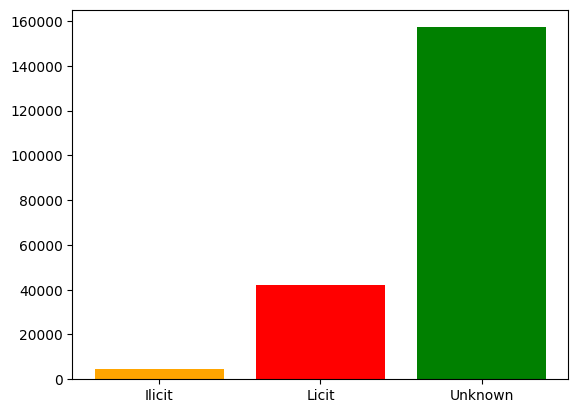

In [6]:
txs_by_class = df_features.groupby('class').count()
plt.bar(['Ilicit', 'Licit', 'Unknown'], txs_by_class['txId'].values, color=['orange', 'r', 'g'] )

Number of transactions by time step:

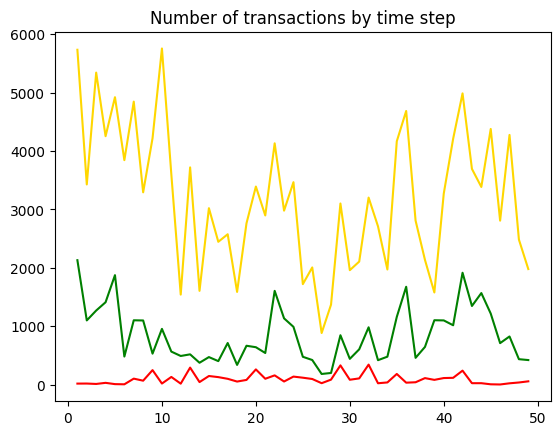

In [7]:
illicit_txs = df_features[df_features['class']==1].groupby('timestep').count()
licit_txs = df_features[df_features['class']==2].groupby('timestep').count()
unknown_txs = df_features[df_features['class']==3].groupby('timestep').count()

plt.title('Number of transactions by time step')
plt.plot(illicit_txs['txId'], color='red')
plt.plot(licit_txs['txId'], color='green')
plt.plot(unknown_txs['txId'], color='gold')


In [8]:
grouped_class = df_features[['timestep','class']].groupby(['timestep','class']).size().to_frame().reset_index()

unknown_count = grouped_class[grouped_class['class'] == 3]
illicit_count = grouped_class[grouped_class['class'] == 1]
licit_count = grouped_class[grouped_class['class'] == 2]

frames = [unknown_count, illicit_count, licit_count]
df_count_distribution = pd.concat(frames)
df_count_distribution.rename(columns={0: 'counts'}).sort_values('timestep')

,timestep,class,counts
2,1,3,5733
0,1,1,17
1,1,2,2130
5,2,3,3427
3,2,1,18
...,...,...,...
143,48,3,2483
141,48,1,36
144,49,1,56
146,49,3,1978


Feature importance (based on a Random Forest)

In [12]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import precision_recall_fscore_support
from sklearn.metrics import f1_score, accuracy_score, confusion_matrix

In [13]:
#remove the unknown transactions
data = df_features.loc[(df_features['class'] != 3), 'txId']
features_licit_ilicit = df_features.loc[df_features['txId'].isin(data)]
features_licit_ilicit

,txId,class,timestep,f0,f1,f2,f3,f4,f5,f6,...,f157,f158,f159,f160,f161,f162,f163,f164,in_degree_edges,out_degree_edges
3,232438397,2,1,0.163054,1.963790,-0.646376,12.409294,-0.063725,9.782742,12.414558,...,0.241128,0.241406,1.072793,0.085530,-0.131155,0.677799,-0.120613,-0.119792,"[232022460, 232047899, 3877118, 230452718, 230...",[92491280]
9,232029206,2,1,-0.005027,0.578941,-0.091383,4.380281,-0.063725,4.667146,0.851305,...,0.241128,0.241406,0.604120,0.008632,-0.131155,0.333211,-0.120613,-0.119792,"[232013274, 230391412, 91411167, 232008929, 23...",[5119722]
10,232344069,2,1,-0.147852,-0.184668,-1.201369,-0.121970,-0.043875,-0.113002,-0.061584,...,0.241128,0.241406,0.018279,-0.087490,-0.131155,-0.097524,-0.120613,-0.119792,[],"[27553029, 234419685]"
11,27553029,2,1,-0.151357,-0.184668,-1.201369,-0.121970,-0.043875,-0.113002,-0.061584,...,-0.979074,-0.978556,0.018279,-0.087490,-0.131155,-0.097524,-0.120613,-0.119792,[232344069],[230411688]
16,3881097,2,1,-0.172306,-0.184668,-1.201369,0.028105,-0.043875,-0.029140,0.242712,...,0.241128,0.241406,0.018279,-0.068266,-0.084674,-0.054450,-1.760926,-1.760984,[89273],[232457116]
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
203752,80329479,2,49,-0.159293,-0.037276,1.018602,-0.121970,0.035526,-0.113002,-0.061584,...,0.231244,-0.388216,-0.098889,1.931078,3.168259,3.707301,-1.390548,-1.214035,[],[47521535]
203754,158406298,2,49,-0.172962,-0.126566,1.018602,-0.121970,-0.063725,-0.113002,-0.061584,...,0.241128,0.241406,10.914916,1.700384,-0.131155,7.914145,-0.120613,-0.119792,[],[47521535]
203759,158375075,1,49,-0.170412,-0.078164,1.018602,0.028105,-0.043875,0.054722,-0.061584,...,1.461330,1.461369,0.018279,-0.087490,-0.131155,-0.097524,-0.120613,-0.119792,[],[157929208]
203763,147478192,2,49,-0.093732,-0.116160,1.018602,-0.121970,-0.043875,-0.113002,-0.061584,...,0.241128,0.241406,0.018279,-0.087490,-0.131155,-0.097524,-0.120613,-0.119792,[],[194019720]


In [16]:
#prepare the X_train/y_train and X_test/y_test

X_data = features_licit_ilicit.loc[(features_licit_ilicit['timestep'] < 35) & (features_licit_ilicit['class'] != 3), 'txId']
X_training_timesteps = features_licit_ilicit.loc[features_licit_ilicit['txId'].isin(X_data)]
X_train = X_training_timesteps.drop(columns=['txId', 'class', 'timestep', 'in_degree_edges', 'out_degree_edges'])

X_data_test = features_licit_ilicit.loc[(features_licit_ilicit['timestep'] >= 35) & (features_licit_ilicit['class'] != 3), 'txId']
X_testing_timesteps = features_licit_ilicit.loc[features_licit_ilicit['txId'].isin(X_data_test)]
X_test = X_testing_timesteps.drop(columns=['txId', 'class', 'timestep', 'in_degree_edges', 'out_degree_edges'])

y_training_timesteps = X_training_timesteps[['class']]
y_training_timesteps = y_training_timesteps['class'].apply(lambda x: 0 if x == 2 else 1 ) # change illicit (class-2) to '0' for classification
y_train = y_training_timesteps

y_testing_timesteps = X_testing_timesteps[['class']]
y_testing_timesteps = y_testing_timesteps['class'].apply(lambda x: 0 if x == 2 else 1 ) # change illicit (class-2) to '0' for classification
y_test = y_testing_timesteps


In [17]:
cRF = RandomForestClassifier(n_estimators=50).fit(X_train.values,y_train.values)
y_preds_RF = cRF.predict(X_test.values)
prec,rec,f1,num = precision_recall_fscore_support(y_test.values, y_preds_RF)

print("Random Forest")
print("Precision: %.3f \nRecall: %.3f \nF1 Score: %.3f"%(prec[1],rec[1],f1[1]))
micro_f1 = f1_score(y_test, y_preds_RF, average='micro')
print("Micro-Average F1 Score: %.3f"%(micro_f1))

Random Forest
Precision: 0.946 
Recall: 0.725 
F1 Score: 0.821
Micro-Average F1 Score: 0.979


In [21]:
imp_df = pd.DataFrame({
    "Feature": X_train.columns,
    "Importance": cRF.feature_importances_
})
imp_df.sort_values(by="Importance", ascending=False)
imp_df_sorted = imp_df.sort_values(by="Importance", ascending=False)
imp_df_sorted[:10]

,Feature,Importance
40,f40,0.057473
52,f52,0.051846
46,f46,0.051791
4,f4,0.044780
42,f42,0.037028
54,f54,0.032816
13,f13,0.029507
131,f131,0.026915
75,f75,0.024970
89,f89,0.024146


<Axes: ylabel='Feature'>

<Figure size 1000x1000 with 0 Axes>

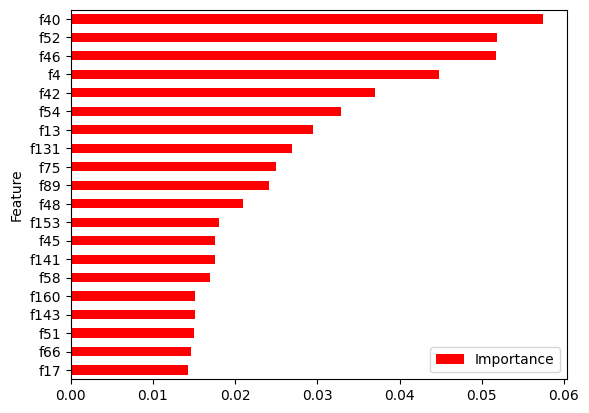

In [20]:
# top 20 features
plt.figure(figsize=(10,10))
imp_df_sorted[:20].iloc[::-1].plot(kind='barh',y='Importance',x='Feature',color='r')

### Graph visualization

In [23]:
import plotly.graph_objs as go 
# All transactions in Time step 32
all_ids = df_features[(df_features['timestep'] == 32)]['txId']
short_edges = df_edges[df_edges['txId1'].isin(all_ids)]
graph = nx.from_pandas_edgelist(short_edges, source = 'txId1', target = 'txId2', 
                                 create_using = nx.DiGraph())
pos = nx.spring_layout(graph)

edge_x = []
edge_y = []
for edge in graph.edges():
    x0, y0 = pos[edge[0]]
    x1, y1 = pos[edge[1]]
    edge_x.append(x0)
    edge_x.append(x1)
    edge_x.append(None)
    edge_y.append(y0)
    edge_y.append(y1)
    edge_y.append(None)

edge_trace = go.Scatter(
    x=edge_x, y=edge_y,
    line=dict(width=0.5, color='blue'),
    hoverinfo='none',
    mode='lines')

node_x = []
node_y = []
node_text=[]
for node in graph.nodes():
    x, y = pos[node]
    node_x.append(x)
    node_y.append(y)
    node_text.append(node)

node_trace = go.Scatter(
    x=node_x, y=node_y,
    mode='markers',
    hoverinfo='text',
    marker=dict(
        color=[],
        size=10,
        colorbar=dict(
            thickness=15,
            title='Transaction Type',
            xanchor='left',
            titleside='right',
            tickmode='array',
            tickvals=[3,1,2],
            ticktext=['Unknown','Illicit','Licit']
        ),
        line_width=2))
node_trace.text=node_text
node_trace.marker.color = pd.to_numeric(df_features[df_features['txId'].isin(list(graph.nodes()))]['class'])

fig = go.Figure(data=[edge_trace, node_trace],
             layout=go.Layout(
                title="All Transactions in Time Step 32",
                titlefont_size=16,
                showlegend=False,
                hovermode='closest',
                margin=dict(b=20,l=5,r=5,t=40),
                annotations=[ dict(
                    showarrow=True,
                    xref="paper", yref="paper",
                    x=0.005, y=-0.002 ) ],
                xaxis=dict(showgrid=False, zeroline=False, showticklabels=False),
                yaxis=dict(showgrid=False, zeroline=False, showticklabels=False))
                )
fig.show()